In [36]:

# Install the 'ordpy' package for ordinal pattern analysis and entropy measures
!pip install ordpy


# Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ordpy import ordinal_distribution, permutation_entropy
from itertools import permutations

# Fig.8 - Visualization of the 6 possible ordinal patterns for dx = 3

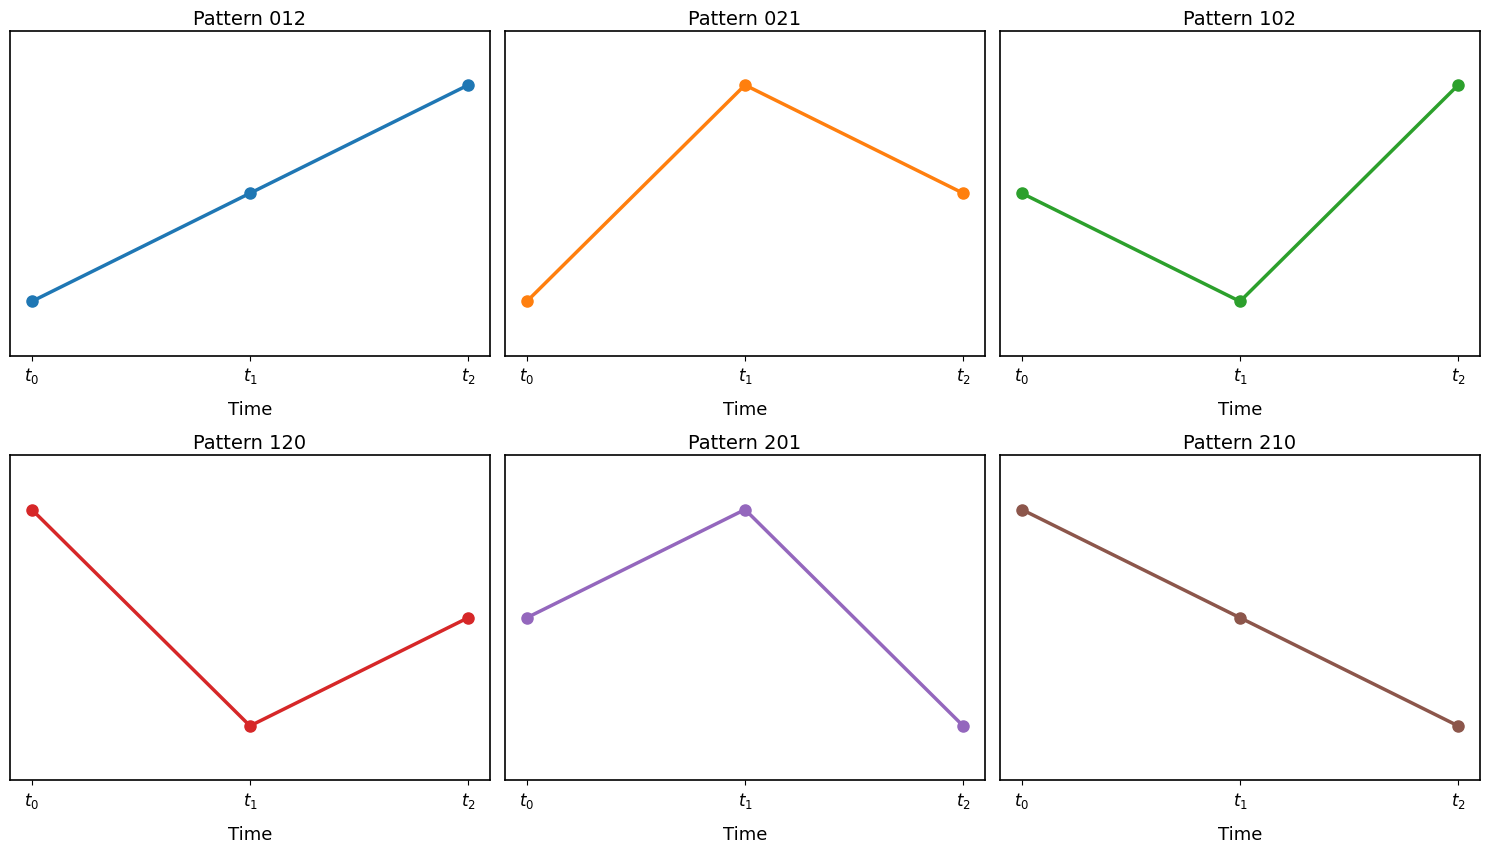

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# ====================== CONFIGURATION ======================
plt.rcParams.update({
    'font.size': 10,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.2,
    'axes.facecolor': 'white',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black'
})

# ====================== FIGURE ======================
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

# Original order of ordinal patterns
ordinal_patterns = list(permutations(range(3)))  # (0,1,2), (0,2,1), (1,0,2), (1,2,0), (2,0,1), (2,1,0)

# Colors for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c',
          '#d62728', '#9467bd', '#8c564b']

time_points = np.arange(3)

# ====================== PLOT EACH PATTERN ======================
for i, pattern in enumerate(ordinal_patterns):
    ax = axes[i // 3, i % 3]
    ax.set_facecolor('white')

    # Visible black spines
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.2)

    # Compute y-values using the ordinal indices
    y_values = [pattern.index(j) for j in range(3)]
    ax.plot(time_points, y_values, marker='o', color=colors[i],
            linestyle='-', linewidth=2.5, markersize=8)

    ax.set_title(f"Pattern {''.join(map(str, pattern))}", fontsize=14, pad=5, color='black')
    ax.set_xlabel("Time", fontsize=13, labelpad=11, color='black')

    # Mantém o eixo y, mas remove legenda e números
    ax.set_ylabel("")               # remove o label "Value"
    ax.set_yticklabels([])          # remove números
    ax.tick_params(axis='y', length=0)  # remove as marcas de tick, mantendo a linha

    # Mantém o eixo x normal
    ax.tick_params(axis='x', labelsize=12, colors='black')
    ax.set_xticks(time_points)
    ax.set_xticklabels([r'$t_0$', r'$t_1$', r'$t_2$'])
    ax.set_ylim(-0.5, 2.5)
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])

# ====================== SAVE FIGURE ======================
fig.savefig("ordinal_patterns.png", dpi=600, bbox_inches='tight', facecolor='white')

plt.show()


# Fig. 10 - Bandt-Pompe method applied to the time series

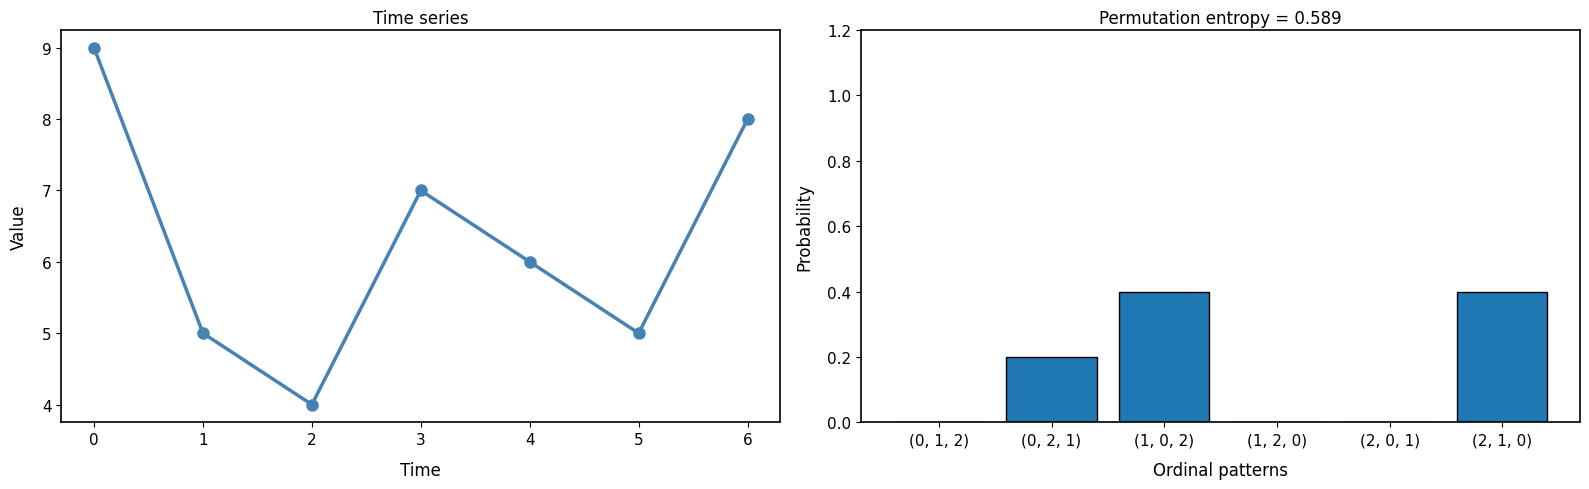

In [39]:
# ====================== TIME SERIES ======================
S = np.array([9, 5, 4, 7, 6, 5, 8], dtype=float)  # Example time series
d = 3  # Embedding dimension

# ====================== ORDPY CALCULATION ======================
# Compute ordinal patterns and probabilities using ordpy
patterns, probs = ordinal_distribution(S, dx=d, taux=1)
H = permutation_entropy(S, dx=d, taux=1)  # Permutation entropy

# List all possible patterns
all_patterns = list(permutations(range(d)))
pattern_names = [str(p) for p in all_patterns]

# Create a full probability array including missing patterns
probs_full = np.zeros(len(all_patterns))
pattern_to_index = {tuple(p): i for i, p in enumerate(all_patterns)}
for i, p in enumerate(patterns):
    probs_full[pattern_to_index[tuple(p)]] = probs[i]

# ====================== PLOTTING ======================
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
plt.subplots_adjust(wspace=0.3)

# ---------------------- Subplot 1: Time Series ----------------------
axs[0].plot(S, 'o-', color='steelblue', linewidth=2.5, markersize=8)  # Plot the time series
axs[0].set_title('Time series', fontsize=12, pad=5, color='black')
axs[0].set_xlabel('Time', fontsize=12, labelpad=10, color='black')
axs[0].set_ylabel('Value', fontsize=12, labelpad=10, color='black')
axs[0].tick_params(axis='both', colors='black')  # Tick color
axs[0].set_facecolor('white')  # White background
axs[0].grid(False)  # No grid
for spine in axs[0].spines.values():
    spine.set_color('black')  # Spine color
    spine.set_linewidth(1.2)  # Spine width

# ---------------------- Subplot 2: Ordinal Pattern Distribution ----------------------
# Color bars differently if probability > 0 or pattern is missing
colors = ['#1f77b4' if p > 0 else '#d3d3d3' for p in probs_full]
bars = axs[1].bar(pattern_names, probs_full, color=colors, edgecolor='black')
axs[1].set_title(f'Permutation entropy = {H:.3f}', fontsize=12, pad=5, color='black')
axs[1].set_xlabel('Ordinal patterns', fontsize=12, labelpad=10, color='black')
axs[1].set_ylabel('Probability', fontsize=12, labelpad=10, color='black')
axs[1].tick_params(axis='x', rotation=0, colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].set_ylim(0, 1.2)  # Y-axis limit
axs[1].set_facecolor('white')  # White background
axs[1].grid(False)  # No grid
for spine in axs[1].spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)

# Adjust layout to prevent overlap
fig.savefig("serie_ordinal.png", dpi=600, bbox_inches='tight')  # dpi alto = melhor definição
plt.tight_layout()
plt.show()


# Fig.11 - Application of the ordinal pattern method

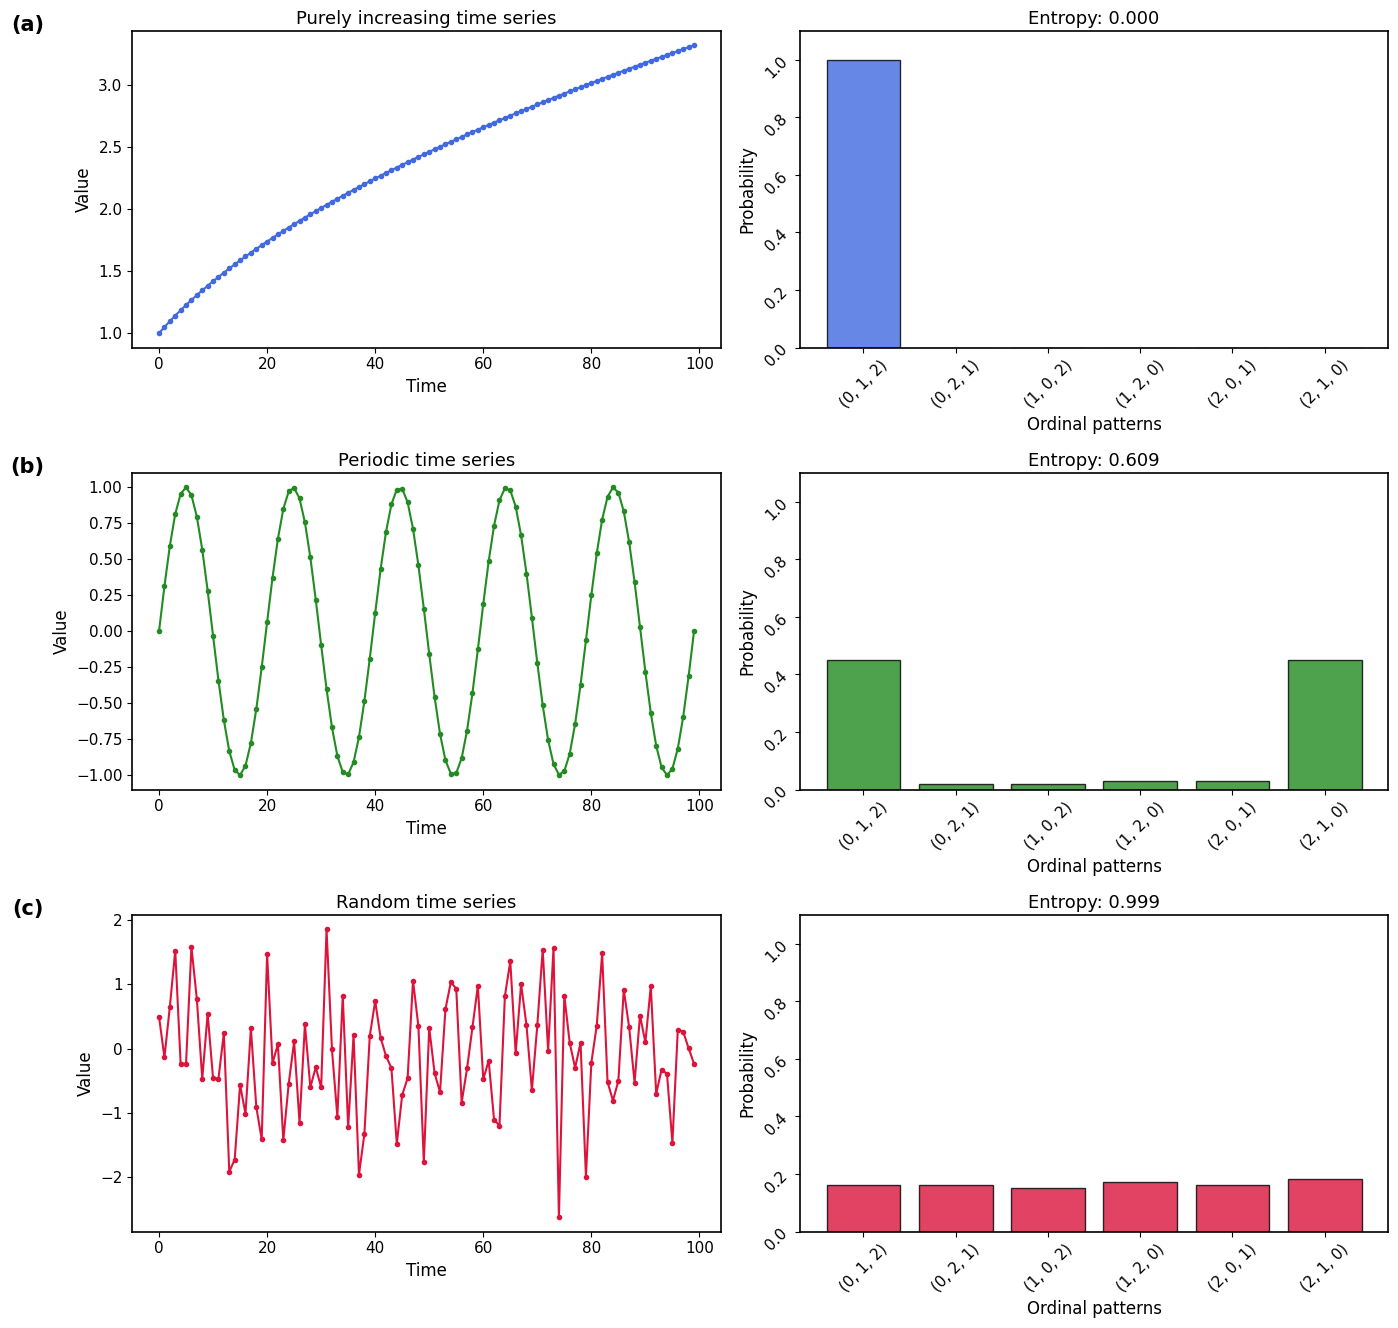

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from ordpy import ordinal_distribution, permutation_entropy  # certifique-se de ter o ordpy instalado

# ====================== CONFIGURATION ======================
np.random.seed(42)
n = 100
m = 3
tau = 1

plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 13,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.2,
    'axes.facecolor': 'white',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black'
})

# ====================== TIME SERIES ======================
x = np.linspace(0, 10, n)
xt_crescente = np.sqrt(1 + x)
t = np.linspace(0, 10 * np.pi, n)
xt_periodica = np.sin(t)
xt_aleatoria = np.random.normal(size=n)

series_data = [
    (xt_crescente, 'Purely increasing time series', 'royalblue'),
    (xt_periodica, 'Periodic time series', 'forestgreen'),
    (xt_aleatoria, 'Random time series', 'crimson')
]

# List all possible ordinal patterns
all_patterns = list(permutations(range(m)))
pattern_names = [str(p) for p in all_patterns]

# ====================== PLOTTING ======================
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

panel_labels = ['(a)', '(b)', '(c)']  # Rótulos de painel

for i, (serie, label, color) in enumerate(series_data):
    # Compute ordinal patterns and probabilities using ordpy
    patterns, probs = ordinal_distribution(serie, dx=m, taux=tau)
    H = permutation_entropy(serie, dx=m, taux=tau)

    # Garantir que todos os padrões apareçam
    probs_full = np.zeros(len(all_patterns))
    pattern_to_index = {tuple(p): j for j, p in enumerate(all_patterns)}
    for j, p in enumerate(patterns):
        probs_full[pattern_to_index[tuple(p)]] = probs[j]

    # ================== TIME SERIES PLOT ==================
    ax_ts = axs[i, 0]
    ax_ts.plot(serie, color=color, marker='o', markersize=3, linewidth=1.5)
    ax_ts.set_title(f'{label}', fontsize=13, pad=5)
    ax_ts.set_xlabel('Time', fontsize=12)
    ax_ts.set_ylabel('Value', fontsize=12)
    ax_ts.set_facecolor('white')
    ax_ts.tick_params(labelsize=11, colors='black')
    for spine in ax_ts.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.2)

    # Adiciona o rótulo da linha (a), (b), (c)
    ax_ts.text(-0.15, 1.05, panel_labels[i], transform=ax_ts.transAxes,
               fontsize=15, fontweight='bold', va='top', ha='right')

    # ================== ORDINAL PATTERN DISTRIBUTION ==================
    ax_bar = axs[i, 1]
    colors_bar = [color if p > 0 else '#d3d3d3' for p in probs_full]
    ax_bar.bar(pattern_names, probs_full, color=colors_bar, alpha=0.8, edgecolor='black')
    ax_bar.set_title(f'Entropy: {abs(H):.3f}', fontsize=13, pad=5)
    ax_bar.set_xlabel('Ordinal patterns', fontsize=12)
    ax_bar.set_ylabel('Probability', fontsize=12)
    ax_bar.set_ylim(0, 1.1)
    ax_bar.set_facecolor('white')
    ax_bar.tick_params(labelsize=11, colors='black', rotation=45)
    for spine in ax_bar.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.2)

plt.tight_layout(rect=[0, 0, 1, 0.96])

# ====================== SAVE FIGURE ======================
fig.savefig("ordinal_series_entropy.png", dpi=600, bbox_inches='tight', facecolor='white')

plt.show()
